# Stock Market Prediction 
### Introduction:
In this project, we are working on Stock Market Prediction using historical stock data for Meta (formerly Facebook). The goal is to predict the stock's closing price based on features such as Open, High, Low, and Volume. We are going to use multiple machine learning models (Random Forest, XGBoost, LightGBM, and LSTM) and compare their performance. Ultimately, we will choose the best model and save it for deployment.

#### Step 1: Import Necessary Libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
import lightgbm as lgb
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt  # For visualization
import seaborn as sns  # For better plots


#### Step 1. Data Collection
Data cleaning is crucial for improving model performance.

In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\sowjanya\Desktop\Data Science Projects\Stock Market Prediction\META From 2012 To Dec-2024.csv")

# Inspect the first few rows of the dataset to understand its structure
print(df.head())


                        Date       Open       High        Low      Close  \
0  2012-05-18 00:00:00-04:00  41.923771  44.864916  37.885929  38.115238   
1  2012-05-21 00:00:00-04:00  36.420340  36.549951  32.900938  33.927845   
2  2012-05-22 00:00:00-04:00  32.512110  33.489168  30.847123  30.906942   
3  2012-05-23 00:00:00-04:00  31.275834  32.402441  31.265864  31.903942   
4  2012-05-24 00:00:00-04:00  32.851093  33.110311  31.674635  32.930851   

      Volume  
0  573576400  
1  168192700  
2  101786600  
3   73600000  
4   50237200  


#### 2. Data Cleaning
2.1. Handle Missing Data

In [7]:
# Handle missing data - Backward fill and forward fill separately
df.bfill(inplace=True)  # Backward fill missing values
df.ffill(inplace=True)  # Forward fill missing values

# Verify if missing values are handled
print("\nMissing values after filling:")
print(df.isnull().sum())



Missing values after filling:
Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


#### 2.2. Remove Duplicates

In [9]:
# Remove any potential duplicate rows from the dataset
df.drop_duplicates(inplace=True)


#### 2.3. Inspect Data Types and Descriptive Statistics

In [11]:
# Check data types and basic summary statistics of the dataset
print("\nData types of each column:")
print(df.dtypes)

print("\nSummary statistics of the dataset:")
print(df.describe())



Data types of each column:
Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

Summary statistics of the dataset:
              Open         High          Low        Close        Volume
count  3154.000000  3154.000000  3154.000000  3154.000000  3.154000e+03
mean    182.219536   184.556975   179.930616   182.295546  2.945289e+07
std     125.725423   127.240969   124.170800   125.745071  2.582098e+07
min      18.025729    18.215159    17.497319    17.676779  5.467500e+06
25%      86.975628    87.932749    86.093286    86.983105  1.553605e+07
50%     164.454851   166.802778   162.181687   164.544571  2.180520e+07
75%     237.888737   240.844846   234.765652   238.095623  3.363070e+07
max     600.979981   602.950012   589.960022   595.940002  5.735764e+08


#### 3. Feature Engineering
3.1. Define Features and Target

In [13]:
# Define features (X) and target variable (y)
X = df[['Open', 'High', 'Low', 'Volume']]  # Features
y = df['Close']  # Target variable (closing price)


#### Step 4: Split Data into Training & Testing Sets
Splitting the dataset ensures the model generalizes well on unseen data.

In [15]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


#### Step 5: Data Scaling for LSTM
Neural networks like LSTMs perform better with normalized data.

In [17]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler to scale values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))

# Scale the features for training and testing
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#### Step 6: Train Multiple Models
##### 1️⃣ Random Forest Model

In [19]:
from sklearn.ensemble import RandomForestRegressor

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict using the model
rf_pred = rf_model.predict(X_test)


##### 2️⃣ XGBoost Model

In [21]:
from xgboost import XGBRegressor

# Train the XGBoost model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict using the model
xgb_pred = xgb_model.predict(X_test)


##### 3️⃣ LightGBM Model

In [23]:
import lightgbm as lgb

# Train the LightGBM model
lgb_model = lgb.LGBMRegressor(n_estimators=100, random_state=42)
lgb_model.fit(X_train, y_train)

# Predict using the model
lgb_pred = lgb_model.predict(X_test)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000735 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 2523, number of used features: 4
[LightGBM] [Info] Start training from score 147.703985


##### 4️⃣ LSTM Model

C:\Users\sowjanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 29423.1387
Epoch 2/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 25091.4512
Epoch 3/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 25031.1836
Epoch 4/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 23045.8184
Epoch 5/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 22177.4258
Epoch 6/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21200.6621
Epoch 7/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19980.5547
Epoch 8/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 18733.0898
Epoch 9/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 18771.5957
Epoch 10/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 18012.9961
Epoch 11/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16380.4424
Epoch 12/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16490.2617
Epoch 13/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14961.7764
Epoch 14/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14981.5391
Epoch 15/100
79

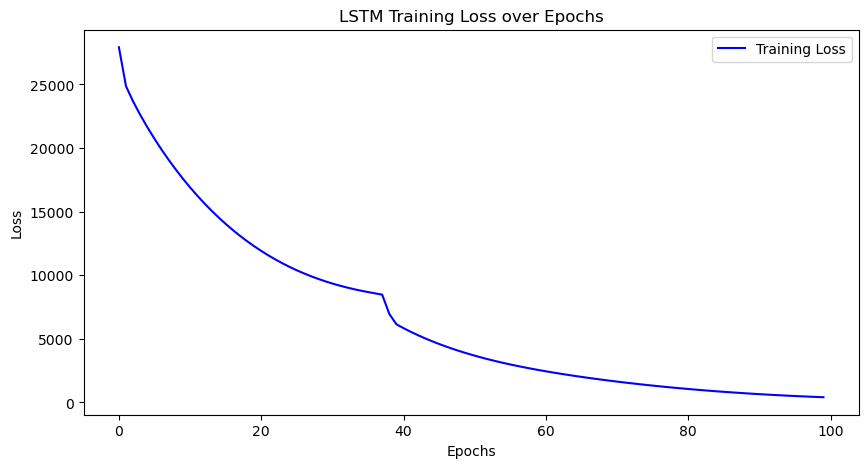

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step 


In [25]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping

# Reshape data for LSTM (3D format required for LSTM)
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Define the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)))
lstm_model.add(LSTM(50, return_sequences=False))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

# Fit LSTM model
history = lstm_model.fit(X_train_lstm, y_train, epochs=100, batch_size=32, verbose=1, callbacks=[early_stopping])

# ------------------- Plot Training and Validation Loss -------------------

# We can track the loss during training with EarlyStopping (which we've already defined).
# Let's plot the loss curve after fitting the model.
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', color="blue")
plt.title("LSTM Training Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Predict with LSTM
lstm_pred = lstm_model.predict(X_test_lstm)
r2_lstm = r2_score(y_test, lstm_pred)
mae_lstm = mean_absolute_error(y_test, lstm_pred)
mse_lstm = mean_squared_error(y_test, lstm_pred)
rmse_lstm = np.sqrt(mse_lstm)

#### Step 7: Evaluate Model Performance
Comparison of all models based on R² Score, MAE, MSE, and RMSE.

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate performance metrics for each model
def evaluate_model(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return r2, mae, mse, rmse

# Evaluate Random Forest
r2_rf, mae_rf, mse_rf, rmse_rf = evaluate_model(y_test, rf_pred)

# Evaluate XGBoost
r2_xgb, mae_xgb, mse_xgb, rmse_xgb = evaluate_model(y_test, xgb_pred)

# Evaluate LightGBM
r2_lgb, mae_lgb, mse_lgb, rmse_lgb = evaluate_model(y_test, lgb_pred)

# Evaluate LSTM
r2_lstm, mae_lstm, mse_lstm, rmse_lstm = evaluate_model(y_test, lstm_pred)


#### 8. Compare Model Performance

In [29]:
# Create a DataFrame to compare model performances
results_df = pd.DataFrame([{
    "Model": "Random Forest", 
    "R² Score": r2_rf, 
    "MAE": mae_rf, 
    "MSE": mse_rf, 
    "RMSE": rmse_rf
}, {
    "Model": "XGBoost", 
    "R² Score": r2_xgb, 
    "MAE": mae_xgb, 
    "MSE": mse_xgb, 
    "RMSE": rmse_xgb
}, {
    "Model": "LightGBM", 
    "R² Score": r2_lgb, 
    "MAE": mae_lgb, 
    "MSE": mse_lgb, 
    "RMSE": rmse_lgb
}])

# Add LSTM results to the DataFrame
results_df = pd.concat([results_df, pd.DataFrame([{
    "Model": "LSTM", 
    "R² Score": r2_lstm, 
    "MAE": mae_lstm, 
    "MSE": mse_lstm, 
    "RMSE": rmse_lstm
}])], ignore_index=True)

print("\nFinal Model Performance Comparison:")
print(results_df)



Final Model Performance Comparison:
           Model  R² Score        MAE           MSE        RMSE
0  Random Forest  0.719864  45.959855   6559.500076   80.990741
1        XGBoost  0.712212  46.766873   6738.695337   82.089557
2       LightGBM  0.694834  48.188995   7145.596545   84.531630
3           LSTM  0.107333  93.685921  20902.193292  144.575908


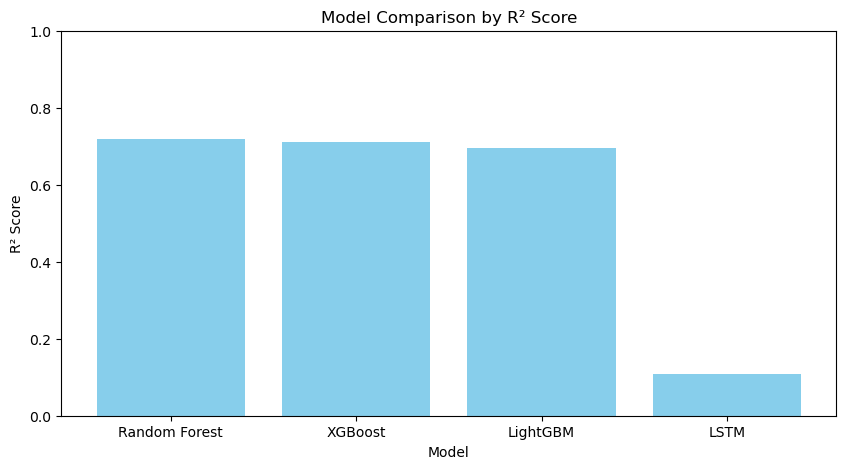

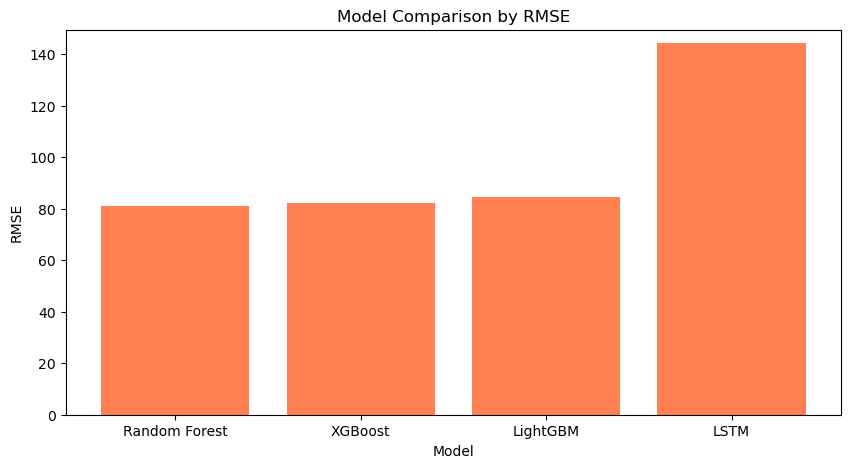

In [30]:
import matplotlib.pyplot as plt

# Create a DataFrame for the comparison
performance_df = pd.DataFrame([
    {"Model": "Random Forest", "R² Score": r2_rf, "RMSE": rmse_rf},
    {"Model": "XGBoost", "R² Score": r2_xgb, "RMSE": rmse_xgb},
    {"Model": "LightGBM", "R² Score": r2_lgb, "RMSE": rmse_lgb},
    {"Model": "LSTM", "R² Score": r2_lstm, "RMSE": rmse_lstm}
])

# Plotting R² Score Comparison
plt.figure(figsize=(10, 5))
plt.bar(performance_df["Model"], performance_df["R² Score"], color="skyblue")
plt.title("Model Comparison by R² Score")
plt.xlabel("Model")
plt.ylabel("R² Score")
plt.ylim(0, 1)
plt.show()

# Plotting RMSE Comparison
plt.figure(figsize=(10, 5))
plt.bar(performance_df["Model"], performance_df["RMSE"], color="coral")
plt.title("Model Comparison by RMSE")
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.ylim(0, max(performance_df["RMSE"]) + 5)  # Adjust based on RMSE values
plt.show()


#### 9. Actual vs Predicted Comparison

#####  Visualizing Actual vs Predicted

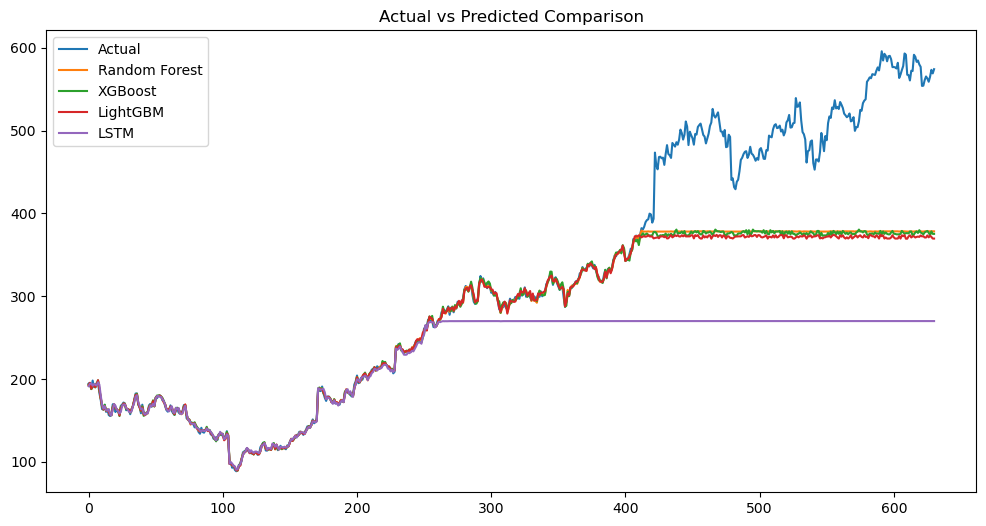

In [33]:
import matplotlib.pyplot as plt

# Create a DataFrame for actual vs predicted comparison
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'RF_Prediction': rf_pred,
    'XGB_Prediction': xgb_pred,
    'LGB_Prediction': lgb_pred,
    'LSTM_Prediction': lstm_pred.flatten()  # Flatten for LSTM predictions
})

# Plot actual vs predicted values for each model
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual")
plt.plot(rf_pred, label="Random Forest")
plt.plot(xgb_pred, label="XGBoost")
plt.plot(lgb_pred, label="LightGBM")
plt.plot(lstm_pred.flatten(), label="LSTM")
plt.legend()
plt.title("Actual vs Predicted Comparison")
plt.show()


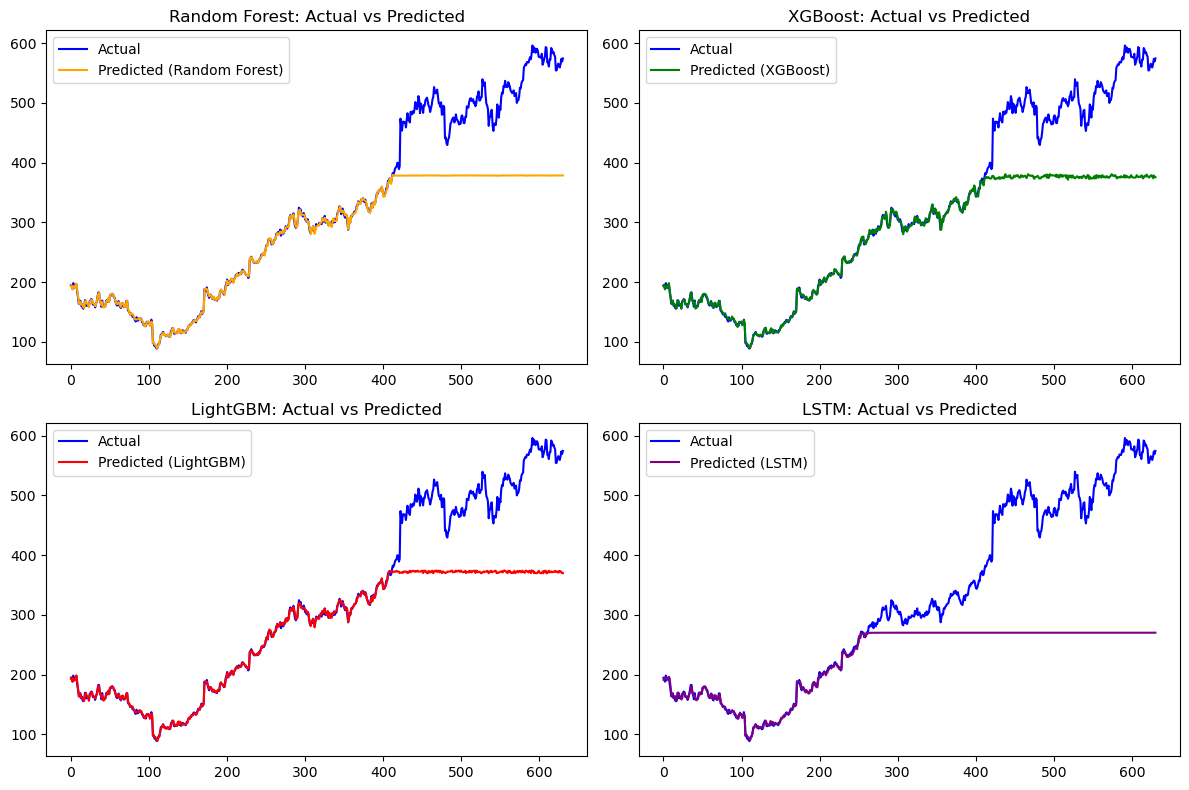

In [34]:
# Plotting Actual vs Predicted values for each model
plt.figure(figsize=(12, 8))

# Random Forest
plt.subplot(2, 2, 1)
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(rf_pred, label='Predicted (Random Forest)', color='orange')
plt.title("Random Forest: Actual vs Predicted")
plt.legend()

# XGBoost
plt.subplot(2, 2, 2)
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(xgb_pred, label='Predicted (XGBoost)', color='green')
plt.title("XGBoost: Actual vs Predicted")
plt.legend()

# LightGBM
plt.subplot(2, 2, 3)
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(lgb_pred, label='Predicted (LightGBM)', color='red')
plt.title("LightGBM: Actual vs Predicted")
plt.legend()

# LSTM
plt.subplot(2, 2, 4)
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(lstm_pred.flatten(), label='Predicted (LSTM)', color='purple')
plt.title("LSTM: Actual vs Predicted")
plt.legend()

plt.tight_layout()
plt.show()


#### 10. Model Accuracy Comparison

In [36]:
# Creating a comparison DataFrame to rank models by RMSE (or any metric of choice)
performance_df = pd.DataFrame([
    {"Model": "Random Forest", "R² Score": r2_rf, "RMSE": rmse_rf},
    {"Model": "XGBoost", "R² Score": r2_xgb, "RMSE": rmse_xgb},
    {"Model": "LightGBM", "R² Score": r2_lgb, "RMSE": rmse_lgb},
    {"Model": "LSTM", "R² Score": r2_lstm, "RMSE": rmse_lstm}
])

# Sort by RMSE (Lower is better)
performance_df_sorted = performance_df.sort_values(by="RMSE")
print("\nModel Performance Sorted by RMSE (Lower is Better):")
print(performance_df_sorted)

# Finalize the best model based on the lowest RMSE
best_model_name = performance_df_sorted.iloc[0]["Model"]
print(f"\nBest Model for Deployment: {best_model_name}")



Model Performance Sorted by RMSE (Lower is Better):
           Model  R² Score        RMSE
0  Random Forest  0.719864   80.990741
1        XGBoost  0.712212   82.089557
2       LightGBM  0.694834   84.531630
3           LSTM  0.107333  144.575908

Best Model for Deployment: Random Forest


#### 11. Finalizing the Best Model for Deployment

In [38]:
import joblib

# Saving the best model based on RMSE or R² Score
if best_model_name == "Random Forest":
    # Save RandomForest model
    joblib.dump(rf_model, r"C:\Users\sowjanya\Desktop\Data Science Projects\Stock Market Prediction\models\best_model_rf.pkl")
    print("\nBest Model (Random Forest) saved to disk.")
elif best_model_name == "XGBoost":
    # Save XGBoost model
    joblib.dump(xgb_model, r"C:\Users\sowjanya\Desktop\Data Science Projects\Stock Market Prediction\models\best_model_xgb.pkl")
    print("\nBest Model (XGBoost) saved to disk.")
elif best_model_name == "LightGBM":
    # Save LightGBM model
    joblib.dump(lgb_model, r"C:\Users\sowjanya\Desktop\Data Science Projects\Stock Market Prediction\models\best_model_lgb.pkl")
    print("\nBest Model (LightGBM) saved to disk.")
else:
    # Save LSTM model
    lstm_model.save(r"C:\Users\sowjanya\Desktop\Data Science Projects\Stock Market Prediction\models\best_model_lstm.h5")
    print("\nBest Model (LSTM) saved to disk.")



Best Model (Random Forest) saved to disk.
